### import number dataset from mnist then implement single layer neural network and then put one hidden layer, see results.

In [4]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 8s 1us/step


In [5]:
len(x_train)

60000

In [8]:
len(x_test)

10000

In [9]:
x_train[0].shape

(28, 28)

In [53]:
#Here x_train[0] is single image, thats why it has two dimensional array.
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

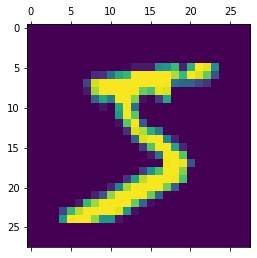

In [11]:
plt.matshow(x_train[0])

In [15]:
y_train[2]

4

In [16]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [17]:
x_train.shape

(60000, 28, 28)

###### Flatten x_train and x_test for better accuracy!

In [23]:
x_train_flattened = x_train.reshape(len(x_train),28*28)
x_test_flattened = x_test.reshape(len(x_test),28*28)

In [24]:
x_test_flattened.shape

(10000, 784)

In [25]:
x_train_flattened.shape

(60000, 784)

In [54]:
#After flatten 2D image array becomes 1D .
x_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

#### Data wasn't scaled!!

In [32]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation = 'sigmoid')
])
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
#fit is where training is happening.
model.fit(x_train_flattened, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 8s 2ms/step - loss: 9.8854 - accuracy: 0.8382
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 6.1578 - accuracy: 0.8788
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 5.7795 - accuracy: 0.8837
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 5.5633 - accuracy: 0.8848
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 5.4409 - accuracy: 0.8862


### Scaling!!

In [33]:
x_train = x_train /255
x_test = x_test /255

In [34]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [35]:
x_train_flattened = x_train.reshape(len(x_train),28*28)
x_test_flattened = x_test.reshape(len(x_test),28*28)

#### After data scaling train the dataset

In [36]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation = 'sigmoid')
])
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
#fit is where training is happening.
model.fit(x_train_flattened, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 8s 2ms/step - loss: 0.4683 - accuracy: 0.8764
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3035 - accuracy: 0.9159
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2834 - accuracy: 0.9202
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2729 - accuracy: 0.9230
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2670 - accuracy: 0.9259


In [37]:
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 4s 7ms/step - loss: 0.2635 - accuracy: 0.9264


[0.26353782415390015, 0.9264000058174133]

In [39]:
model.predict(x_test_flattened)

array([[2.4641633e-02, 4.0783999e-07, 6.9641322e-02, ..., 9.9977684e-01,
        9.4608903e-02, 6.2640131e-01],
       [4.8811045e-01, 9.5020235e-03, 9.9942905e-01, ..., 1.8294736e-12,
        2.3127744e-01, 2.5866420e-09],
       [3.6337972e-04, 9.9491036e-01, 6.8545735e-01, ..., 1.4121899e-01,
        3.6625141e-01, 5.4632306e-02],
       ...,
       [2.8000311e-06, 5.0081408e-06, 1.6567707e-03, ..., 2.5629133e-01,
        5.1528716e-01, 8.5375005e-01],
       [9.1343078e-05, 2.9724836e-04, 2.1183491e-04, ..., 4.1981864e-05,
        6.5916955e-01, 1.6295910e-04],
       [1.0313392e-02, 6.1516930e-10, 3.5844418e-01, ..., 5.6712764e-08,
        4.8023462e-04, 7.4601968e-07]], dtype=float32)

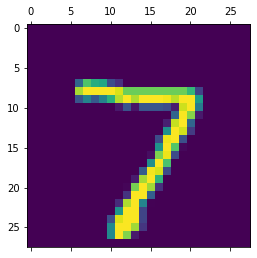

In [40]:
plt.matshow(x_test[0])

In [41]:
y_predicted = model.predict(x_test_flattened)
y_predicted[0]

array([2.4641633e-02, 4.0783999e-07, 6.9641322e-02, 9.5928788e-01,
       2.2917390e-03, 9.5804632e-02, 1.2410164e-06, 9.9977684e-01,
       9.4608903e-02, 6.2640131e-01], dtype=float32)

In [42]:
np.argmax(y_predicted[0])

7

In [46]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

#### Confusion matrix!!

In [48]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 961,    0,    2,    2,    0,    6,    5,    2,    2,    0],
       [   0, 1118,    3,    2,    0,    1,    4,    2,    5,    0],
       [   3,   11,  927,   15,    7,    4,   11,   10,   39,    5],
       [   4,    0,   19,  918,    0,   27,    2,   11,   20,    9],
       [   1,    1,    6,    1,  910,    0,    9,    4,    8,   42],
       [   9,    3,    4,   27,    9,  779,   15,    5,   34,    7],
       [  13,    3,    7,    1,    7,   13,  910,    2,    2,    0],
       [   1,    7,   24,    5,    9,    0,    0,  948,    1,   33],
       [   4,   11,    6,   23,    9,   24,    9,   12,  868,    8],
       [   8,    7,    2,   10,   21,    5,    0,   21,   10,  925]])>

Text(69.0, 0.5, 'Truth')

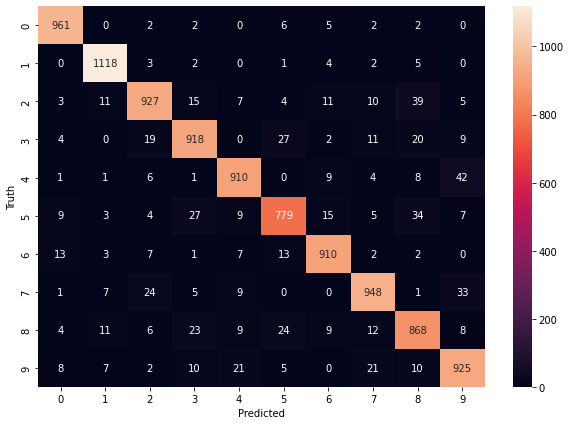

In [50]:
#import seaborn library
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Now see what happen if I put 1 hidden layer!!

In [51]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation = 'relu'),
    keras.layers.Dense(10, activation = 'relu')
])
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
#fit is where training is happening.
model.fit(x_train_flattened, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 15s 5ms/step - loss: 2.3457 - accuracy: 0.0997
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 2.3025 - accuracy: 0.0987
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 2.3025 - accuracy: 0.0987
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 2.3025 - accuracy: 0.0987
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 2.3025 - accuracy: 0.0987


Text(69.0, 0.5, 'Truth')

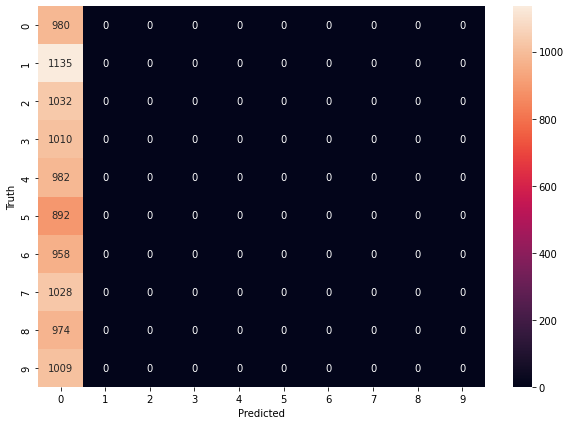

In [52]:
y_predicted = model.predict(x_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)
cm

#import seaborn library
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')